# Đây là dữ liệu khi đã train xong.
# Thời gian: 11:15 PM , 29/08/2021. 

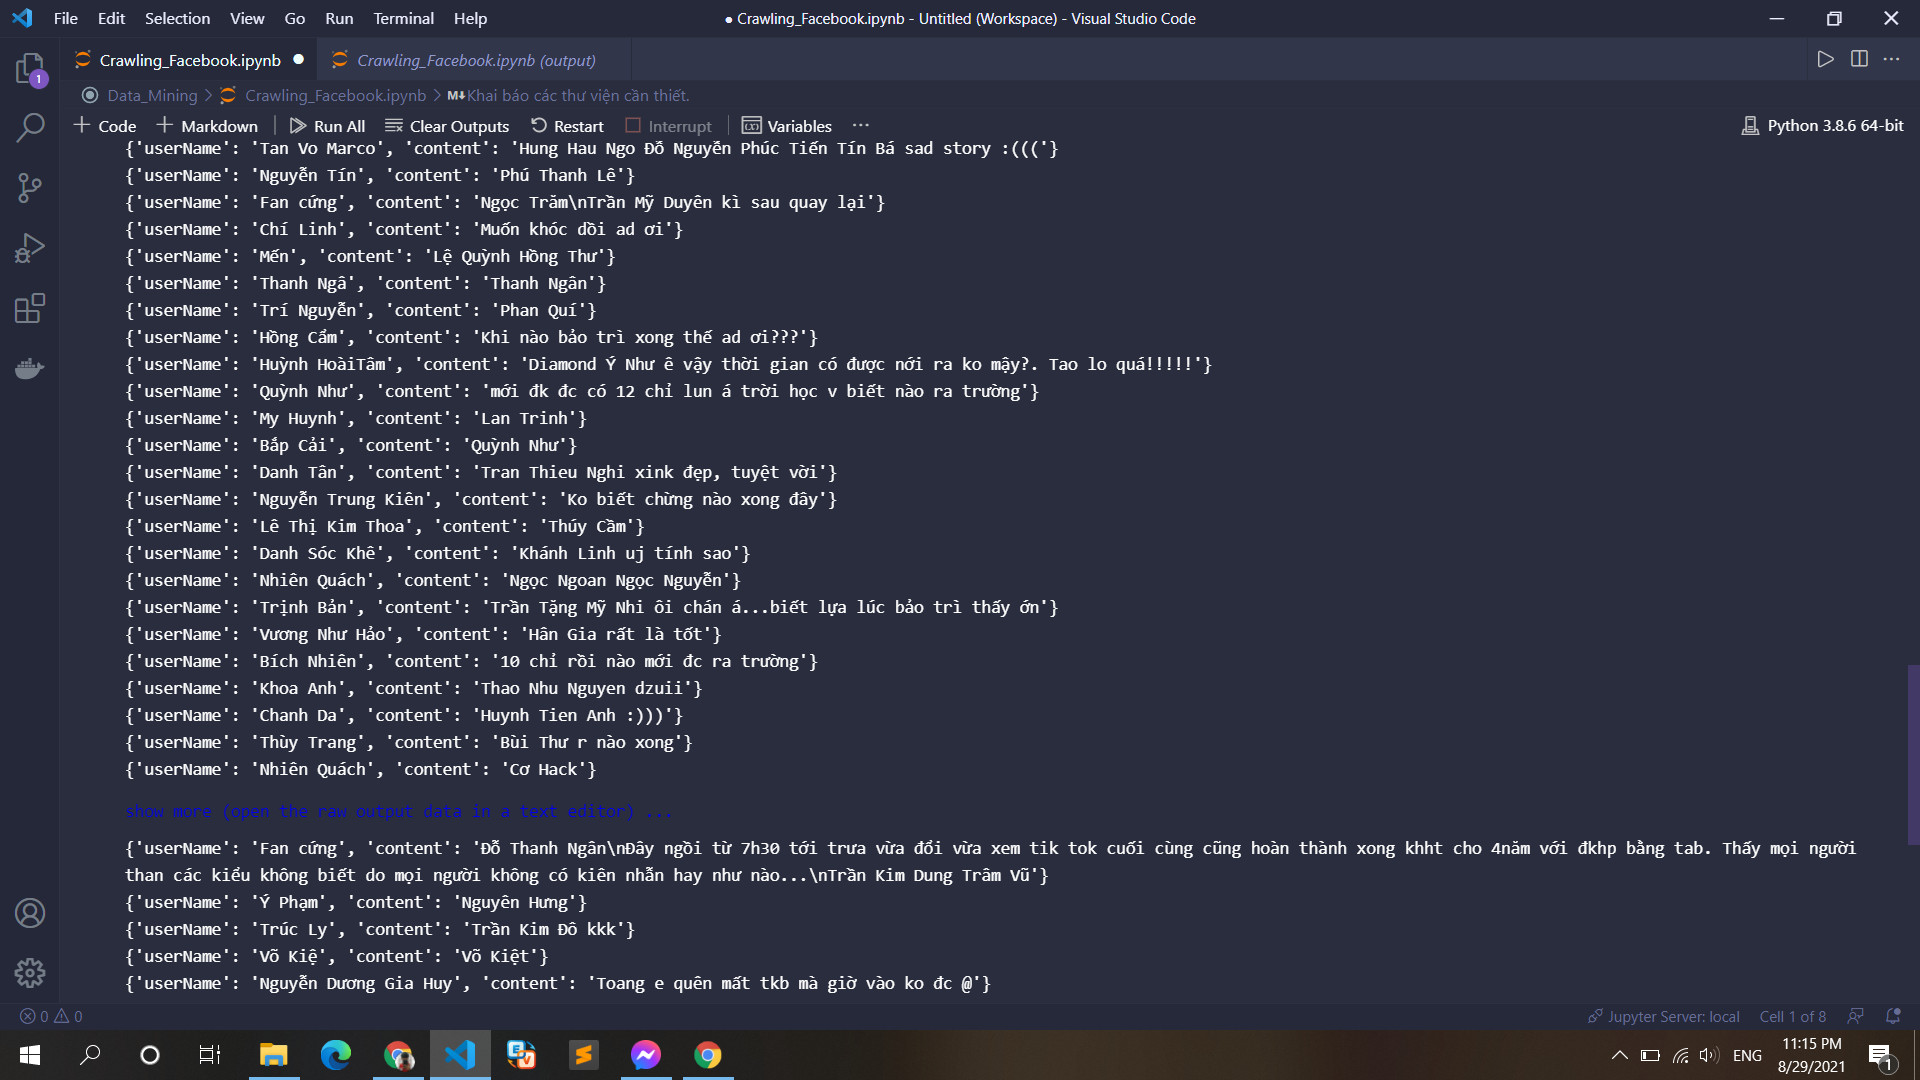

# 1. Khai báo các thư viện cần thiết.

In [13]:
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.keys import Keys
from random import randint
import random
import json
import codecs

# 2. Khai báo biến browser.

In [14]:
options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}
options.add_experimental_option("prefs", prefs)
options.add_argument("start-maximized")
browser = webdriver.Chrome(options=options, executable_path='./chromedriver.exe')

# 3. Hàm lưu dữ liệu vào file data.json

In [15]:
def write_reviews_to_file(_data):
    filename = 'data_comments.json'
    with open(filename, "r", encoding='utf-8') as file:
        try:
            data = json.load(file)
        except json.decoder.JSONDecodeError:
            data = []
          
    data.append(_data)

    with codecs.open(filename, "w", encoding='utf-8') as file:
        json.dump(data, file, ensure_ascii=False)

# 4. Truy cập đến trang web cần Crawling.

In [16]:
#Truy cập đến trang login facebook.
browser.get("http://facebook.com")

#Điền username và password để thực hiện quá trình login.
txtUser = browser.find_element_by_id("email")
txtUser.send_keys("0383768720") # Điền username vào dấu nháy kép.

#Sử dụng hàm sleep kèm theo hàm random để ngắt các hành động tránh bị khoá account khi crawling data.
sleep(random.randint(3,5))

txtPassword = browser.find_element_by_id("pass")
txtPassword.send_keys("0845003151") #Điền password vào dấu nháy kép.

sleep(random.randint(3, 5))

#Submit form
txtPassword.send_keys(Keys.ENTER)

sleep(random.randint(5, 9))

#Truy cập link bài viêt cần cào dữ liệu
browser.get("https://www.facebook.com/daa.ctu.edu.vn/posts/3223134181068646")

#Do có 5 lần xem thêm comment nên cần phải click 5 lần.
for i in range(0,5):
    sleep(random.randint(5,9))
    moreComments_link = browser.find_element_by_xpath("/html/body/div[1]/div/div[1]/div/div[3]/div/div/div[1]/div[1]/div[4]/div[1]/div/div/div/div/div/div/div/div/div/div[1]/div/div[2]/div/div[4]/div/div/div[2]/div[2]/div[1]/div[2]/span/span")
    moreComments_link.click()


sleep(random.randint(5, 9))

#Tạo 1 list chứa các comment cần lưu trữ.
comment_list = []
comment_list = browser.find_elements_by_class_name("_6cuy")

sleep(random.randint(7, 10))

#Truy cập từng phần tử chứa dữ liệu comment.
for comment in comment_list:
    #Ép kiểu phần tử comment về string để có thể đọc dữ liệu.
    comment = comment.text
    userName = comment[0:comment.find("\n")]
    content = comment[comment.find("\n") + 1:]
    if len(userName) == 0 and len(content) == 0:
        continue
    data = {
        "userName" : userName,
        "content" : content
    }
    #Tạo 1 file ten data.js trước khi chạy
    write_reviews_to_file(data)
    print(data)


{'userName': 'Mi Nami', 'content': 'rồi chừng nào xong ?'}
{'userName': 'Ngọc Hân', 'content': 'Bùi Mỹ Chi'}
{'userName': 'Trương Minh Tính', 'content': "Thanh Liễu cka'n buồn"}
{'userName': 'Lê Hồng Xuân Nguyên', 'content': 'Nguyễn Đình Quý vui lòng quay lại sau'}
{'userName': 'Phan Như Mai', 'content': 'Nảy vừa vào được luôn :))))'}
{'userName': 'Họ Nguyễn', 'content': 'Có biết khoãng bao lâu xong không ad, canh qua nay'}
{'userName': 'Ngoan Lee', 'content': 'Thanh Thanhtuk'}
{'userName': 'Quang Vinh', 'content': 'Thắng Trần Mạnh khóc đi'}
{'userName': 'Trịnh Hồng Diệu Ái', 'content': 'Phi Tran'}
{'userName': 'Nguyễn Võ Kim Uyên', 'content': 'Anh Thy'}
{'userName': 'Trịnh Huỳnh Như', 'content': 'Kim Nhiễn á à :))'}
{'userName': 'Lê Tuấn Kiệt', 'content': 'update phiên bản mới hả ad, em mong chờ quá'}
{'userName': 'Trâm Trâm', 'content': 'Nguyễn Thị Mỹ Hạnh chắc mai có lại thôi chứ gì'}
{'userName': 'Thảo Tăng', 'content': 'Thư Anh 8 năm ra trường'}
{'userName': 'Vân Trần', 'content':